In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(8,8))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline


In [2]:
sc.settings.figdir = "supp_fig1"



In [19]:
#adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11.lesionalonly')
import scanpy as sc
adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v4')


In [20]:
adata=adata[adata.obs["Patient_status"]=="Healthy"]

# deg tables

In [5]:
# adata=adata[(adata.obs["test13"].str.startswith("F3"))|
#                             (adata.obs["test13"].str.startswith("F1"))|
#                             (adata.obs["test13"].str.startswith("F6"))|
#                               (adata.obs["test13"].str.startswith("F7"))|
#                               (adata.obs["test13"].str.startswith("F_"))
#                              ]

 
# desired_order = ['F3: FRC-like',
#        # 'F1: Epithelium-associated',
#     'F1: Superficial',
#     'F6: Inflammatory myofibroblast',
#     'F7: Myofibroblast',
#     'F8: Fascia-like myofibroblast',
#     'F_Fascia'
# ]

# # Convert 'test13' column to a categorical type with the desired order
# adata.obs['test13'] = pd.Categorical(
#     adata.obs['test13'],
#     categories=desired_order,
#     ordered=True
# )



In [6]:
# adata.uns['de_leiden'].keys()

In [7]:
import pandas as pd

CATEGORY = "corefb_names2"
sc.tl.rank_genes_groups(adata, CATEGORY, method='t-test', key_added="de_leiden")

# Extract DEG results



/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [8]:
#
#CATEGORY = "test13"
#sc.tl.rank_genes_groups(adata, CATEGORY, method='t-test', key_added="de_leiden")

# Extract categories (e.g., clusters, conditions)
categories = adata.uns["de_leiden"]["names"].dtype.names  

# Collect data for each category
gene_list = []
logFC_list = []
pval_list = []
group_list = []

for group in categories:
    genes = adata.uns["de_leiden"]["names"][group]
    logFCs = adata.uns["de_leiden"]["logfoldchanges"][group]
    pvals = adata.uns["de_leiden"]["pvals"][group]
    
    gene_list.extend(genes)
    logFC_list.extend(logFCs)
    pval_list.extend(pvals)
    group_list.extend([group] * len(genes))  # Keep track of which group each gene belongs to

# Create DataFrame
deg_results = pd.DataFrame({
    'Gene': gene_list,
    'logFC': logFC_list,
    'p-value': pval_list,
    'Group': group_list  # Optional, helps in tracking DEGs by category
})

# Format p-values to 5 decimal places
deg_results['p-value'] = deg_results['p-value'].apply(lambda x: f"{x:.5e}")  # Scientific notation
# Alternatively, use .round(5) if you prefer standard decimal notation:
# deg_results['p-value'] = deg_results['p-value'].round(5)

# Save to CSV
deg_results.to_csv("DEGs_results.csv", index=False)



In [17]:

# Extract categories (e.g., clusters or conditions)
categories = adata.uns["de_leiden"]["names"].dtype.names  

# Collect data for each category (top 100 DEGs)
top_degs = []

for group in categories:
    genes = adata.uns["de_leiden"]["names"][group]
    logFCs = adata.uns["de_leiden"]["logfoldchanges"][group]
    pvals = adata.uns["de_leiden"]["pvals"][group]
    
    # Create a temporary DataFrame for the current group
    temp_df = pd.DataFrame({
        'Gene': genes,
        'logFC': logFCs,
        'p-value': pvals,
        'Group': [group] * len(genes)
    })
    
    # Sort by p-value (or logFC, depending on your preference)
    #temp_df = temp_df.sort_values(by='logFC', ascending=True)  # Sort by p-value ascending

    # Select top 100 DEGs for this group
    top_degs_group = temp_df.head(100)

    # Append the top 100 DEGs of this group to the list
    top_degs.append(top_degs_group)

# Concatenate the top 100 DEGs from all groups into a single DataFrame
top_degs_df = pd.concat(top_degs, axis=0)

# Format p-values to 5 decimal places (scientific notation)
top_degs_df['p-value'] = top_degs_df['p-value'].apply(lambda x: f"{x:.5e}")

# Save the result to CSV
top_degs_df.to_csv("SupplementaryTable2.csv", index=False)

# Display the first few rows of the final DataFrame
print(top_degs_df.head())

      Gene     logFC      p-value            Group
0   COL6A1  2.028954  0.00000e+00  F1: Superficial
1   APCDD1  3.702830  0.00000e+00  F1: Superficial
2  COL18A1  3.613811  0.00000e+00  F1: Superficial
3   COL6A2  1.206123  0.00000e+00  F1: Superficial
4    SFRP2  2.122562  0.00000e+00  F1: Superficial


In [10]:
top_degs_df.shape

(900, 4)

In [11]:
# # # Save to CSV
# deg_results.to_csv("Suppl.csv", index=False)

# deg_results.head()

In [12]:
adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11.lesionalonly')
adata_lesional.obs["lvl3_annotation_pred"].value_counts()
adata_lesional=adata_lesional[(adata_lesional.obs["test13"].str.startswith("F3"))|
                            (adata_lesional.obs["test13"].str.startswith("F1"))|
                            (adata_lesional.obs["test13"].str.startswith("F6"))|
                              (adata_lesional.obs["test13"].str.startswith("F7"))|
                                  (adata_lesional.obs["test13"].str.startswith("F8"))|
                              (adata_lesional.obs["test13"].str.startswith("F_"))
                             ]




desired_order = ['F3: FRC-like',
    'F1: Superficial',
    'F6: Inflammatory myofibroblast',
    'F7: Myofibroblast',
    'F8: Fascia-like myofibroblast',
    'F_Fascia'
]

adata_lesional.obs['test13'] = pd.Categorical(
    adata_lesional.obs['test13'],
    categories=desired_order,
    ordered=True
)



/tmp/ipykernel_3084/544637879.py:22: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_lesional.obs['test13'] = pd.Categorical(


In [14]:
CATEGORY = "test13"
sc.tl.rank_genes_groups(adata_lesional, CATEGORY, method='t-test', key_added="de_leiden")


In [18]:

# Extract categories (e.g., clusters or conditions)
categories = adata_lesional.uns["de_leiden"]["names"].dtype.names  

# Collect data for each category (top 100 DEGs)
top_degs = []

for group in categories:
    genes = adata_lesional.uns["de_leiden"]["names"][group]
    logFCs = adata_lesional.uns["de_leiden"]["logfoldchanges"][group]
    pvals = adata_lesional.uns["de_leiden"]["pvals"][group]
    
    # Create a temporary DataFrame for the current group
    temp_df = pd.DataFrame({
        'Gene': genes,
        'logFC': logFCs,
        'p-value': pvals,
        'Group': [group] * len(genes)
    })
    
    # Sort by p-value (or logFC, depending on your preference)
   # temp_df = temp_df.sort_values(by='p-value', ascending=True)  # Sort by p-value ascending

    # Select top 100 DEGs for this group
    top_degs_group = temp_df.head(100)

    # Append the top 100 DEGs of this group to the list
    top_degs.append(top_degs_group)

# Concatenate the top 100 DEGs from all groups into a single DataFrame
top_degs_df = pd.concat(top_degs, axis=0)

# Format p-values to 5 decimal places (scientific notation)
top_degs_df['p-value'] = top_degs_df['p-value'].apply(lambda x: f"{x:.5e}")

# Save the result to CSV
top_degs_df.to_csv("SupplementaryTable3.csv", index=False)

# Display the first few rows of the final DataFrame
print(top_degs_df.head())

     Gene     logFC      p-value         Group
0    APOE  5.106787  0.00000e+00  F3: FRC-like
1  CXCL12  4.576376  0.00000e+00  F3: FRC-like
2  IGFBP7  2.429603  0.00000e+00  F3: FRC-like
3  CXCL14  3.625990  0.00000e+00  F3: FRC-like
4      C3  4.124011  0.00000e+00  F3: FRC-like


In [ ]:
STOP

# Plots

In [6]:
CATEGORY = "corefb_names2"
sc.tl.rank_genes_groups(adata, CATEGORY, method='t-test', key_added="de_leiden");
import pandas as pd
df2 = pd.DataFrame(adata.uns['de_leiden']['names'])
df2.head(1)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F1: Superficial F2: Universal F2/3: Perivascular F3: FRC-like F4: DS_DPEP1+  \
0          COL6A1           DCN               APOE         APOE         POSTN   

  F4: TNN+COCH+ F4: DP_HHIP+ F5: RAMP1+ F5: NGFR+  
0          COCH        TRPS1        CPE    IGFBP7

In [11]:
# Define a function to extract genes from specified ranges
def extract_genes(df,start, end):
    return [
        gene for col in df.columns if col != "F_Fascia" 
        for gene in df[col].values[start:end]
    ]

GENES_TO_PLOT1 = extract_genes(df2, 0, 10)
GENES_TO_PLOT2 = extract_genes(df2,  10, 20)
#GENES_TO_PLOT3 = extract_genes(df2, 40, 60)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


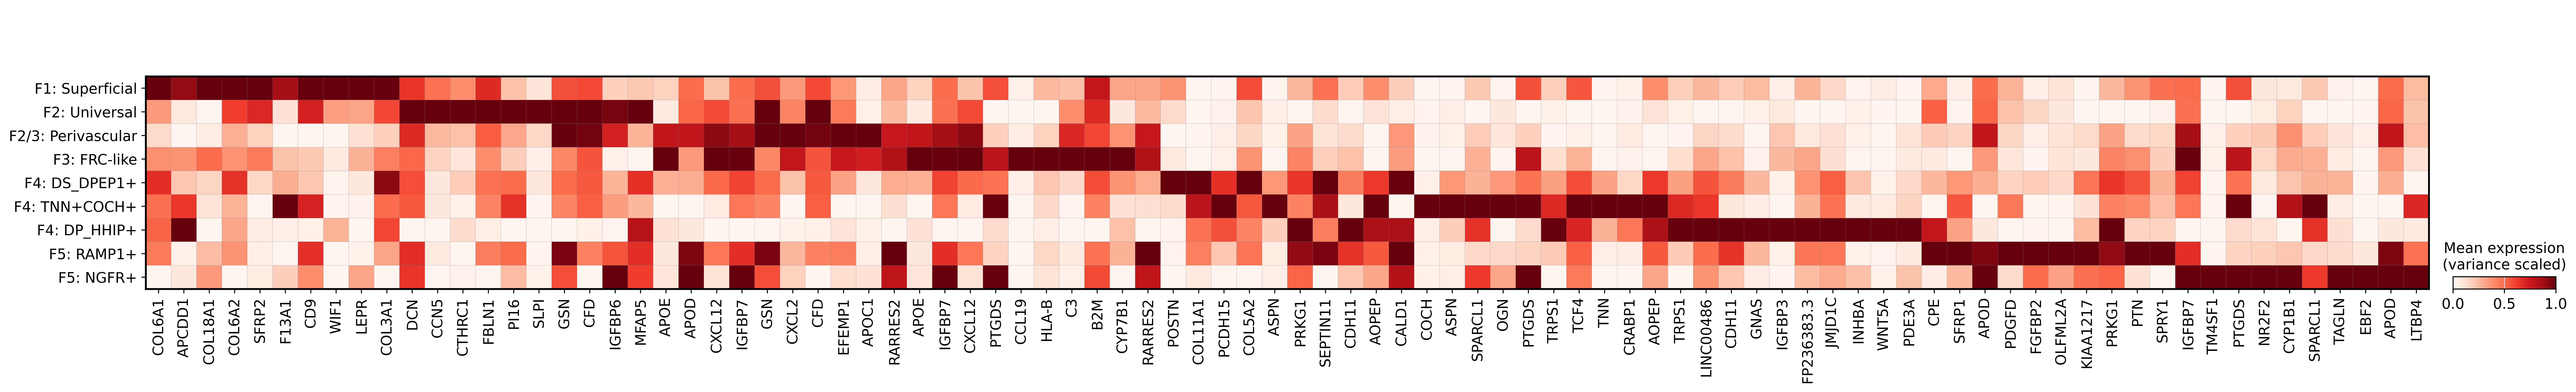

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


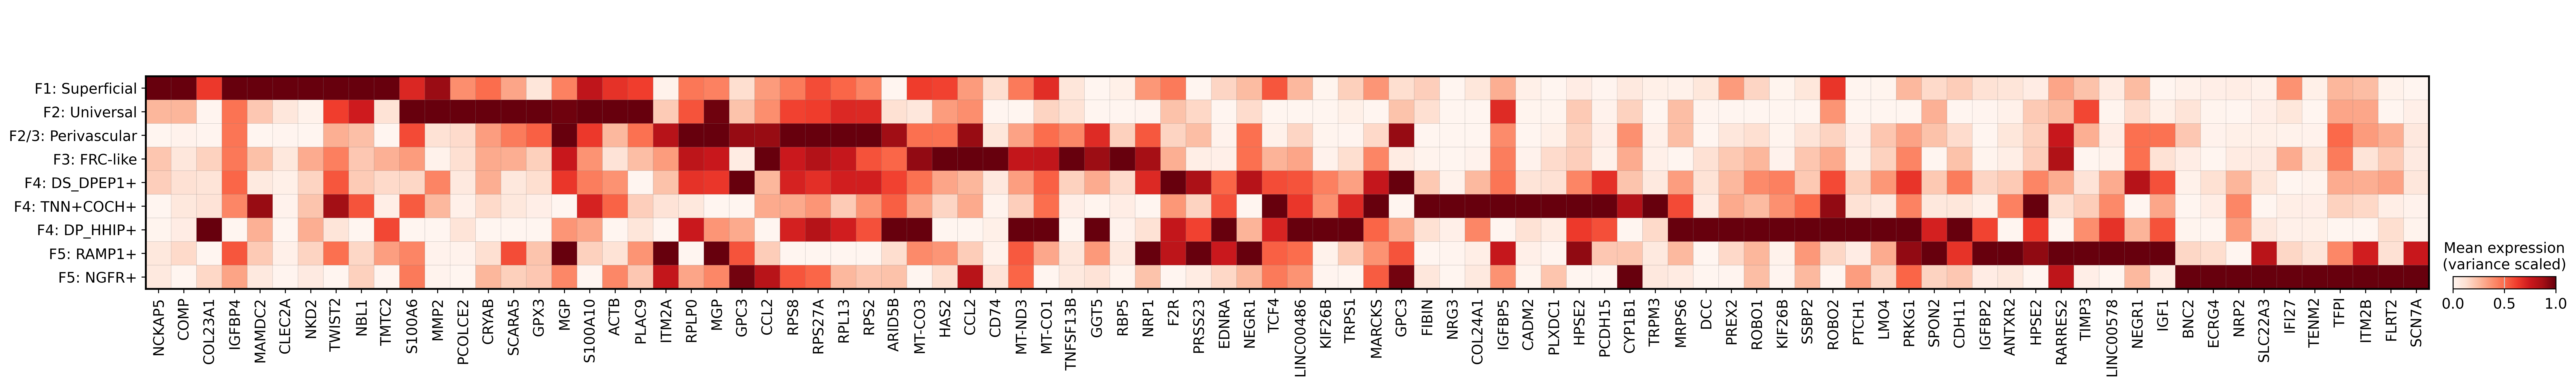

In [12]:
for i,x in enumerate([GENES_TO_PLOT1,GENES_TO_PLOT2]):
    sc.pl.matrixplot(
            adata,
            x,
            groupby=CATEGORY,
            standard_scale="var",
            dendrogram=False,
            cmap="Reds",
            save=f"healthy_top_{i}_degs_per_popn_disease_variancedscaledexpression.pdf",
            colorbar_title='Mean expression\n(variance scaled)',
        ) 


# sole-bold

In [ ]:
SB_GENES = {
    "1": [
        "APCDD1", "COMP", "RGS16", "ID1", "HBB", "RGS2", "COL18A1", "DUSP1", "HBA2", "WIF1",
        "ARRDC3", "NKD2", "DDIT4", "LEPR"
    ],
    "2": [
        "SLPI", "CTHRC1", "FBLN1", "IGFBP6", "PCSK1N", "TSPAN8",
        "MFAP5", "DCN", "CFD", "MMP2", "CRYAB", "COL1A2", "COL1A1", "PI16", "SERPINF1"
    ],
    "3": [
        "CXCL3", "CXCL2", "CXCL1", "C11orf96", "SOD2", "CCL2", "TNFAIP6", "GEM", "MEDAG", "IL6",
        "EIF4A3", "ARID5B", "WTAP", "UAP1", "H2AFZ", "SPSB1", "IGFBP7"
    ],
    "4": [
        "CCL19", "APOE", "PTGDS", "APOD", "SOCS3", "CXCL12", "EGR1", "JUN", "ABCA8", "RARRES2",
        "FOS", "PLEKHA2", "IGFBP7", "TNFRSF13B", "C3", "TXNIP", "CD74"
    ],
    "5": [
        "COCH", "ASPN", "POSTN", "TNN", "DPEP1", "COL11A1", "SFRP1", "HTRA1", "MRPS6", "GPC3",
        "SPARCL1", "GPM6B", "COL5A2", "FIBIN", "F2R", "MXRA5", "EDNRA", "OGN"
    ]
}

sc.pl.matrixplot(
            adata,
            SB_GENES,
            groupby="corefb_names2",
            standard_scale="var",
            dendrogram=False,
            cmap="Reds",
            save=f"suppfig1b_sbgenes.pdf",
            colorbar_title='Mean expression\n(variance scaled)',
        ) 


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


# Lesionsl

In [13]:
adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11.lesionalonly')


In [ ]:
adata=adata[(adata.obs["test13"].str.startswith("F3"))|
                            (adata.obs["test13"].str.startswith("F1"))|
                            (adata.obs["test13"].str.startswith("F6"))|
                              (adata.obs["test13"].str.startswith("F7"))|
                                  (adata.obs["test13"].str.startswith("F8"))|
                              (adata.obs["test13"].str.startswith("F_"))
                             ]



In [14]:
CATEGORY = "test13"
sc.tl.rank_genes_groups(adata, CATEGORY, method='t-test', key_added="de_leiden");
import pandas as pd
df2 = pd.DataFrame(adata.uns['de_leiden']['names'])
df2.head(1)


F1: Superficial F2: Universal F2/3: Perivascular F3: FRC-like F4: DS_DPEP1+  \
0          APCDD1           DCN                CFD         APOE         RPS4X   

  F4: TNN+COCH+ F4: DP_HHIP+ F5: RAMP1+ F5: NGFR+  \
0          COCH        INHBA       APOD      APOD   

  F6: Inflammatory myofibroblast F7: Myofibroblast  \
0                          INHBA            COL1A1   

  F8: Fascia-like myofibroblast F_Fascia  
0                         POSTN     COMP

In [15]:
# Define a function to extract genes from specified ranges
def extract_genes(df,start, end):
    return [
        gene for col in df.columns if col != "F_Fascia" 
        for gene in df[col].values[start:end]
    ]

GENES_TO_PLOT1 = extract_genes(df2, 0, 10)
GENES_TO_PLOT2 = extract_genes(df2,  10, 20)
#GENES_TO_PLOT3 = extract_genes(df2, 40, 60)

In [17]:
for i,x in enumerate([GENES_TO_PLOT1,GENES_TO_PLOT2]):
    sc.pl.matrixplot(
            adata,
            x,
            groupby=CATEGORY,
            standard_scale="var",
            dendrogram=False,
            cmap="Reds",
            save=f"disease_top_{i}_degs_per_popn_disease_variancedscaledexpression.pdf",
            colorbar_title='Mean expression\n(variance scaled)',
        ) 


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


In [ ]:
STOP

# Supplementary figure 1

In [ ]:
# import scanpy as sc
# PATH_TO_PRURIGO='/lustre/scratch126/cellgen/team298/ls34/adata_all.scvelo.preppedall3.lesionalonly2.3.integrated'

    
# adata=sc.read_h5ad(PATH_TO_PRURIGO)
# adata.shape



In [ ]:
# del(target_adata.uns['cell_type_pred_colors'])
adata2=sc.read_h5ad(f'/nfs/team298/ls34/fibroblast_atlas/fig1/model_NEWDATA/adata_clustered_prurigo.h5ad.v2.mindist4.allgenes')
# f'/nfs/team298/ls34/fibroblast_atlas/fig1/model_scpoli_allfibroblasts_{hvg_number}_2/target_adata_{hvg_number}.h5ad'

In [ ]:
# del(target_adata.uns['cell_type_pred_colors'])
PATH =  f'/nfs/team298/ls34/fibroblast_atlas/fig1/adata_prurigonew_withall.h5ad.v2.HVGS'
adata=sc.read_h5ad(PATH)


In [ ]:
#PATH_TO_PRURIGO = f'/nfs/team298/ls34/fibroblast_atlas/fig1/model_NEWDATA/adata_clustered_prurigo.h5ad.v2.mindist4'

#min dist 0.2
# FULL GENE VERSION

# adata.obs["test12"]=adata.obs["cell_type_pred"]
# custom_colors = {'F1: Epithelium-associated': np.array([1.        , 1.        , 0.89803922, 1.        ]),
#  'F1: EA-Regenerative': np.array([0.99607843, 0.80915033, 0.39607843, 1.        ]),
#  'F2: Universal': np.array([0.81411765, 0.88392157, 0.94980392, 1.        ]),
#  'F2/3: Bridge': np.array([0.47294118, 0.71163399, 0.85071895, 1.        ]),
#  'F3: FRC-like CCL19+': np.array([0.99692426, 0.89619377, 0.84890427, 1.        ]),
#  'F4: DS_DPEP1+': np.array([0.82745098, 0.93254902, 0.80313725, 1.        ]),
#  'F4: TNN+COCH+': np.array([0.50196078, 0.79058824, 0.50143791, 1.        ]),
#  'F4: DP_HHIP+': np.array([0.15294118, 0.56183007, 0.28313725, 1.        ]),
#  'F5: RAMP1+':np.array([0.6177624 , 0.60213764, 0.78345252, 1.        ]),
#  'F5: NGFR+': np.array([0.47320261, 0.43267974, 0.69934641, 1.        ]),
#  'F6: Myofibroblast inflamm\atory': np.array([0., 1., 1., 1.]),
#  'F6: Myofibroblast': np.array([0.33333333, 0.66666667, 1.        , 1.        ]),
#  'F7: Myofibroblast fascia-like': np.array([0.95686275, 0.55686275, 0.74509804, 1.0]),
#  'F_Fascia': np.array([0, 0, 0, 0.3])
#                                }


# try:
#     adata.uns["test12_colors"] = [custom_colors[cat] for cat in adata.obs["test12"].cat.categories]
# except KeyError as e:
#     print(f"Error: Missing color for category {e}")
# sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(8, 8
#                                                                                  ))
# Generate the UMAP plot
sc.pl.umap(
    adata,
    color='test12',
    show=False,
    frameon=False,
    #legend_loc="on data",
    legend_fontsize=25,
    s=150,
    title='',
    legend_fontoutline=2
)

 

In [ ]:
adata2

In [ ]:
{x:x for x in adata2.obs["cell_type_pred"].unique()}

In [ ]:
RENAME = {'F6: Myofibroblast inflammatory': 'F6: Inflammatory myofibroblast',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
 'F1: EA-Regenerative': 'F1: Superficial',
 'F1: Epithelium-associated': 'F1: Superficial',
 'F3: FRC-like CCL19+': 'F3: FRC-like',
 'F2: Universal': 'F2: Universal',
 'F6: Myofibroblast': 'F7: Myofibroblast',
 'F2/3: Bridge': 'F2/3: Perivascular',
 'F5: RAMP1+': 'F5: RAMP1+',
 'F5: NGFR+': 'F5: NGFR+',
 'F4: TNN+COCH+': 'F4: TNN+COCH+',
 'F4: DP_HHIP+': 'F4: DP_HHIP+'}
adata2.obs["test13"]=adata2.obs["cell_type_pred"].map(RENAME)

In [ ]:

sc.pl.umap(
    adata2,
    color='test13',
    show=False,
    frameon=False,
    #legend_loc="on data",
    legend_fontsize=25,
    s=150,
    title='',
    legend_fontoutline=2
)

 